In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from importlib import reload
from datetime import datetime
import tensorflow as tf
import time


# get the relative path
pref                = os.getcwd()

os.environ["RL_PATH"]   = pref

if f'{pref}/RLLibrary' not in sys.path:
    sys.path.append(f'{pref}/RLLibrary')


In [2]:
from RLLibrary.FinUseCases.PortfolioManagement import DataManager, EnvironmentManager
from RLLibrary.utils import constants

[] Actions
[] Actions


In [3]:
reload(DataManager)
reload(EnvironmentManager)

[] Actions


<module 'RLLibrary.FinUseCases.PortfolioManagement.EnvironmentManager' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/FinUseCases/PortfolioManagement/EnvironmentManager.py'>

In [18]:
assets = ["APA", "BMY"]
initialWeight = [0.5, 0.5]
actions = [
    [-0.03, 0.03], 
    [-0.02, 0.02], 
    [-0.01, 0.01], 
    [0.0, 0.0], 
    [0.01, -0.01], 
    [0.02, -0.02], 
    [0.03, -0.03], 
]

DATA_DIR = constants.DATA_DIR

env = EnvironmentManager.Portfolio(assets, initialWeight, \
                    nhistoricalDays = 5, \
                    startDate = "2019-01-01", endDate = "2019-12-31", \
                    actions = actions, \
                    assetDataPath = os.path.join(DATA_DIR, "PortfolioManagement"), \
                    config = {"initialCash": 1000000, "minCash": 0.02, "transactionFee": 0.0000}, \
                    penalizeFactors = {"Risk": -0.08, "ForbiddenAction": -8})

In [17]:
from RLLibrary.FinUseCases.PortfolioManagement import StrategyManager

In [12]:
from RLLibrary.FinUseCases.PortfolioManagement.ModelManager.A3C import Agent

In [16]:
reload(Agent)

[] Agent


<module 'RLLibrary.FinUseCases.PortfolioManagement.ModelManager.A3C.Agent' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/FinUseCases/PortfolioManagement/ModelManager/A3C/Agent.py'>

In [15]:
reload(StrategyManager)

[] Straegy


<module 'RLLibrary.FinUseCases.PortfolioManagement.StrategyManager' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/FinUseCases/PortfolioManagement/StrategyManager.py'>

In [8]:
from RLLibrary.FinUseCases import CustomGym
CustomGym.register(
    id = "PortfolioManagement-v0",
    entry_point = 'FinUseCases.PortfolioManagement.EnvironmentManager:Portfolio',
    kwargs = {"assets" : ["APA", "BMY"], "initialWeight" : [0.5, 0.5], \
                    "nhistoricalDays" : 30, \
                    "startDate" : "2019-01-01", "endDate" : "2019-12-31", \
                    "actions" : [(-0.1,0.1)], \
                    "assetDataPath" : os.path.join(DATA_DIR, "PortfolioManagement"), \
                    "config" : {"initialCash": 1000000, "minCash": 0.02, "transactionFee": 0.0001}, 
                    "penalizeFactors" : {"Risk": -0.08, "ForbiddenAction": -8}}


)

In [9]:
assets = ["APA", "BMY"]
initialWeight = [0.5, 0.5]


args = {"startDate" : "2017-01-01", "endDate" : "2017-12-31", "actions": [(0.0, 0.0)]}
stgy = StrategyManager.BuyandHoldStrategy(envName = "PortfolioManagement-v0", **args)


Making new env: %s (%s) PortfolioManagement-v0 {'startDate': '2017-01-01', 'endDate': '2017-12-31', 'actions': [(0.0, 0.0)]}
[] Actions


In [10]:
stgy.getEnvironmentArgs()

{'assets': ['APA', 'BMY'],
 'initialWeight': [0.5, 0.5],
 'nhistoricalDays': 30,
 'startDate': '2017-01-01',
 'endDate': '2017-12-31',
 'actions': [(0.0, 0.0)],
 'assetDataPath': '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/FinUseCases/../../data/PortfolioManagement',
 'config': {'initialCash': 1000000, 'minCash': 0.02, 'transactionFee': 0.0001},
 'penalizeFactors': {'Risk': -0.08, 'ForbiddenAction': -8}}

In [9]:
port = stgy.run()

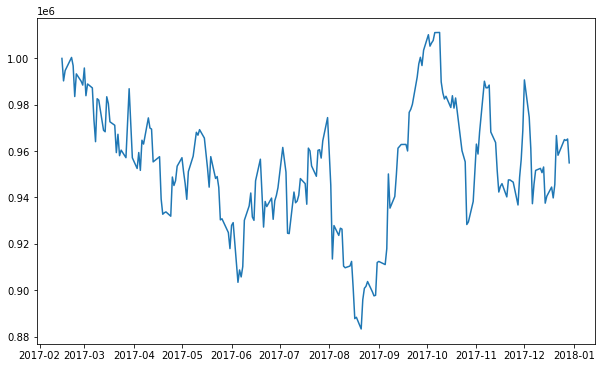

In [10]:
stgy.plotPerformance()

In [11]:
reload(Strategy)

<module 'RLLibrary.service.PortfolioManagement.Strategy' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/service/PortfolioManagement/Strategy.py'>

In [12]:
actions = [
    [-0.03, 0.03], 
    [-0.02, 0.02], 
    [-0.01, 0.01], 
    [0.0, 0.0], 
    [0.01, -0.01], 
    [0.02, -0.02], 
    [0.03, -0.03], 
]

args = {"startDate" : "2019-01-01", "endDate" : "2019-04-30", "actions": actions}
stgy1 = Strategy.RLStrategy_A3C(envName = "PortfolioManagement-v0", **args)



In [13]:
stgy1.train(MAX_EPISODES = 4000, \
                ActorCriticModel = None, \
                actorHiddenUnits = [32], criticHiddenUnits = [32], optimizer_learning_rate = 1e-4)

Model: "actor_critic_ff"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  2272      
_________________________________________________________________
dense_1 (Dense)              multiple                  231       
_________________________________________________________________
dense_2 (Dense)              multiple                  2272      
_________________________________________________________________
dense_3 (Dense)              multiple                  33        
Total params: 4,808
Trainable params: 4,808
Non-trainable params: 0
_________________________________________________________________
None
Worker created
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

KeyboardInterrupt: 

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
